# Dividing a box* into patches
\* of any dimension!

In [1]:
import numpy as np
import itertools

Set up box and patch dimensions:

In [2]:
boxsize = 750
n_dim = 3
n_side = 2
size_patch = boxsize/n_side
n_patches = n_side**n_dim # for n_side = 2, and n_dim = 3, there will be 8 patches, aka octants!

Use fancy itertools command to create patch identifiers:

In [3]:
a = np.arange(n_side)
idx_patches = np.array(list(itertools.product(a, repeat=n_dim)))
print(idx_patches)

[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]


Generate some random data:

In [4]:
N = 10000
data = np.random.uniform(size=(N,n_dim))*boxsize

Patchify!
(There must be a better way to do this, but this is what I figured out for now.)

In [5]:
data_patches = []
for iii in idx_patches:
    # define the boundaries of the patch
    mins = iii*size_patch
    maxes = (iii+1)*size_patch
    # define mask as where all of the values must be within the boundaries
    mask_min = np.array([(data[:,d]<maxes[d]) for d in range(n_dim)])
    mask_max = np.array([(data[:,d]>=mins[d]) for d in range(n_dim)])
    mask = np.vstack([mask_min, mask_max]).T
    mask_combined = np.all(mask, axis=1)
    # perform masking and save to array
    data_patches.append(data[mask_combined])

In [6]:
# check that we ended up with all the points, just divided into patches
assert np.sum([dp.shape[0] for dp in data_patches])==N, "Wrong number of patched points!"

### Let's try plotting!

In [7]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

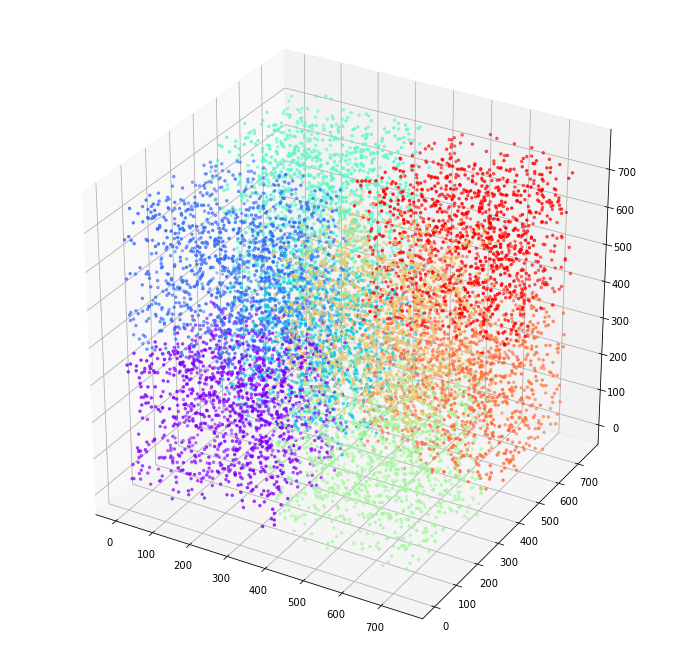

In [8]:
plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')

cvals = np.linspace(0,1,n_patches)
cmap = matplotlib.cm.get_cmap('rainbow')

for i, iii in enumerate(idx_patches):
    ax.scatter(*data_patches[i].T, s=6, color=cmap(cvals[i]))

Wahoo, rainbow octants!